In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import librosa
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
import os
import pandas as pd

# Define the emotion dictionary for RAVDESS
emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Function to extract emotion from filename
def extract_emotion_from_filename(filename):
    parts = filename.split('-')
    emotion_code = parts[2]  # Emotion code
    emotion = emotion_dict.get(emotion_code, 'unknown')
    return emotion

# Create a list to store file paths and their corresponding emotions
file_paths = []
emotions = []

# Path to the RAVDESS dataset (replace with actual path)
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):  # Ensure we're looking at a directory
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                emotion = extract_emotion_from_filename(wav_file)
                
                # Append the file path and emotion to the lists
                file_paths.append(file_path)
                emotions.append(emotion)

# Create a DataFrame
emotion_df = pd.DataFrame({'File_Path': file_paths, 'Emotion': emotions})
emotion_df.head()  # Display the first few rows of the DataFrame


,File_Path,Emotion
0,/kaggle/input/ravdess-emotional-speech-audio/A...,surprised
1,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/A...,disgust
3,/kaggle/input/ravdess-emotional-speech-audio/A...,disgust
4,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral


In [4]:
emotion_df['Emotion'].unique()

array(['surprised', 'neutral', 'disgust', 'fearful', 'sad', 'calm',
       'happy', 'angry'], dtype=object)

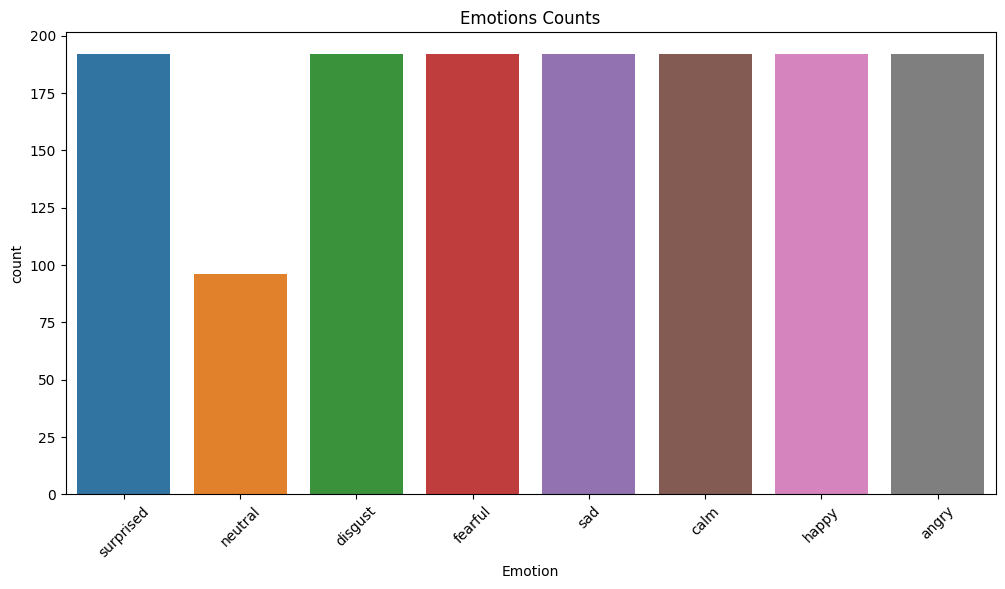

In [5]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=emotion_df)
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [6]:
emotion_names=emotion_df['Emotion'].unique()
emotion_names

array(['surprised', 'neutral', 'disgust', 'fearful', 'sad', 'calm',
       'happy', 'angry'], dtype=object)

In [7]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fearful':'#7D55AA','angry':'#C00808','surprised':'#EE00FF','calm':'#C00899'}

In [8]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [9]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

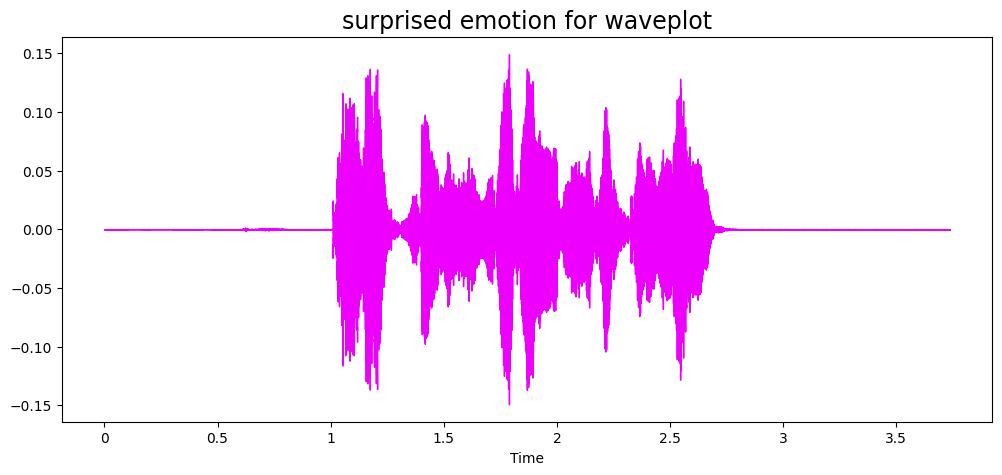

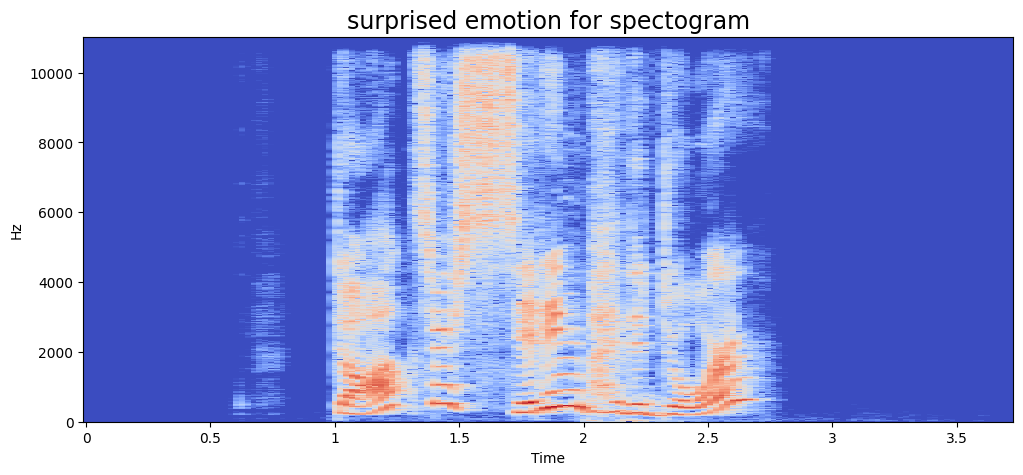

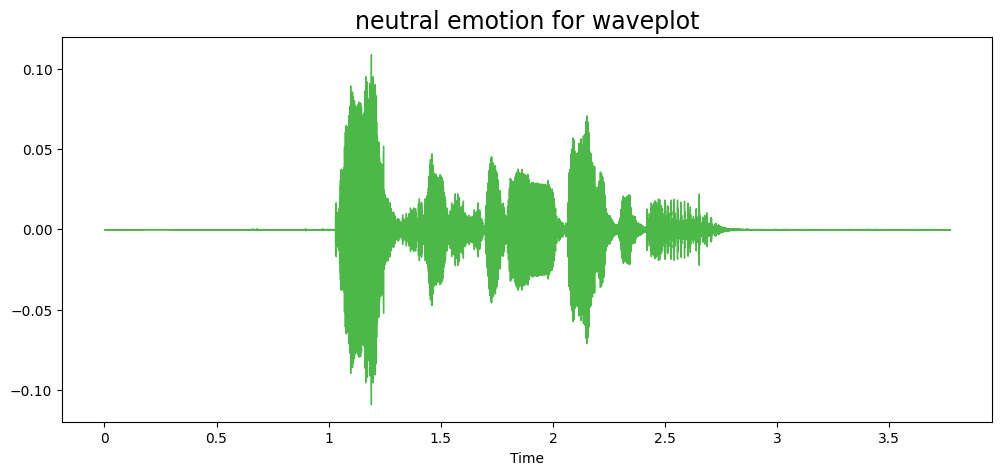

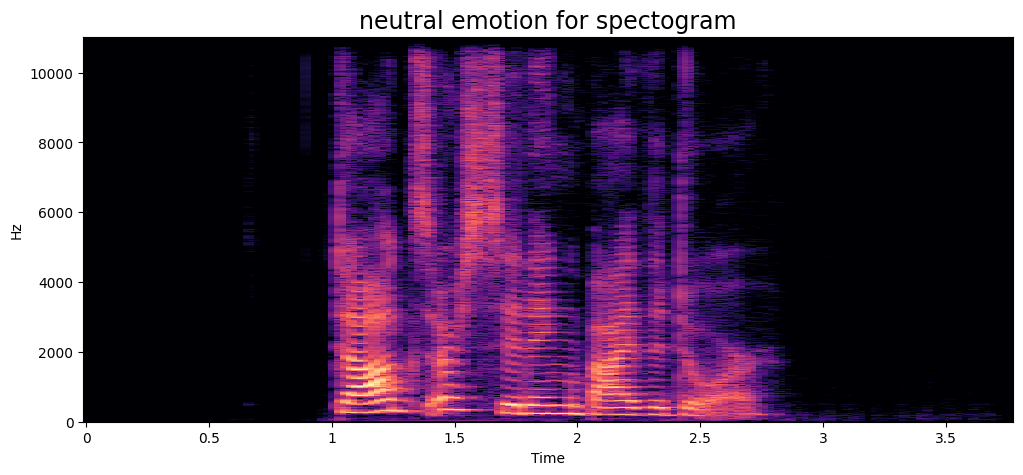

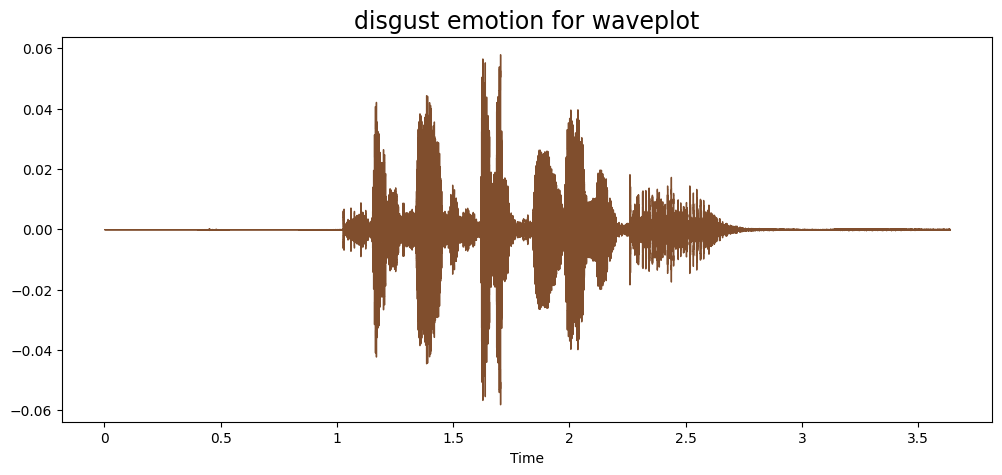

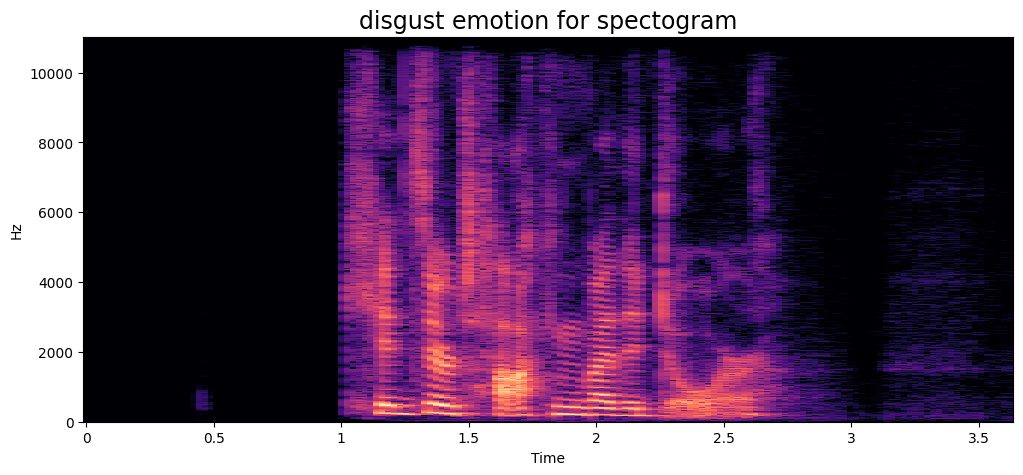

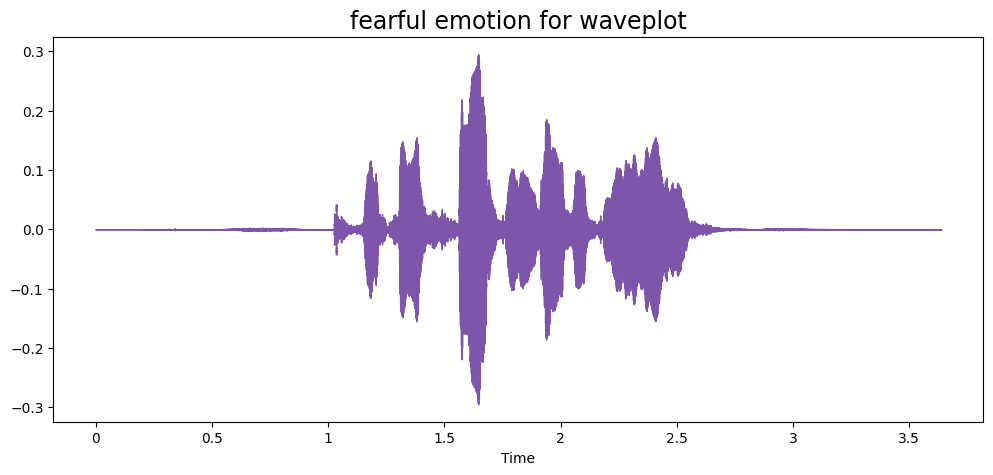

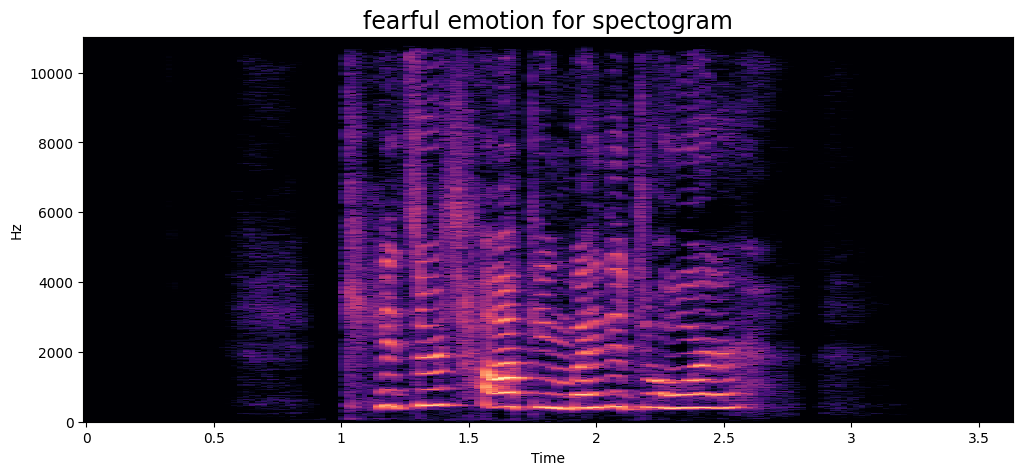

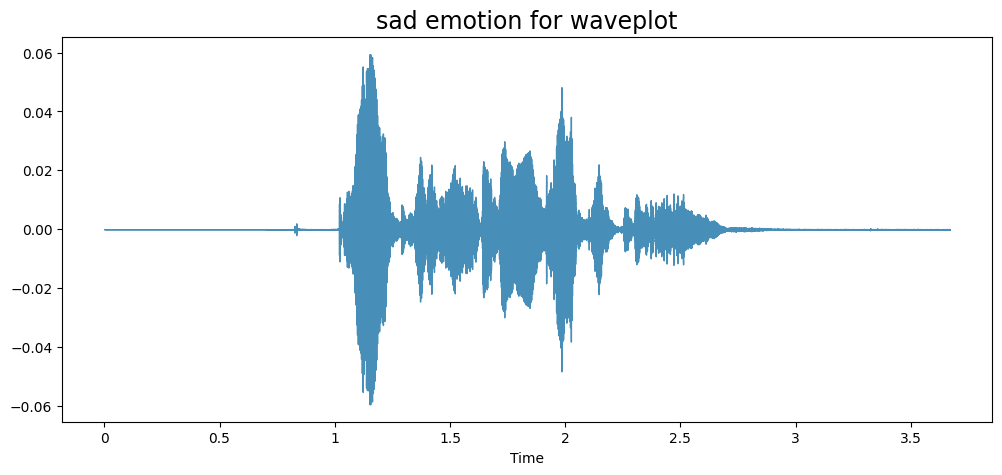

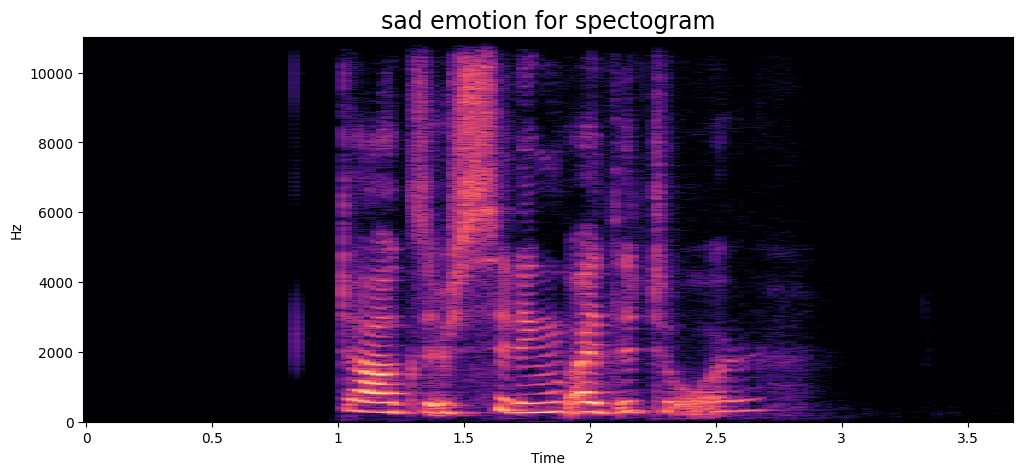

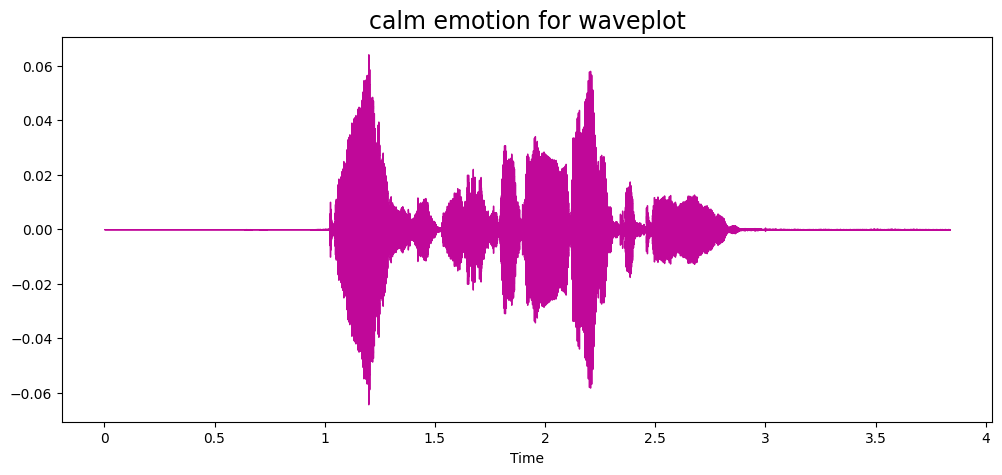

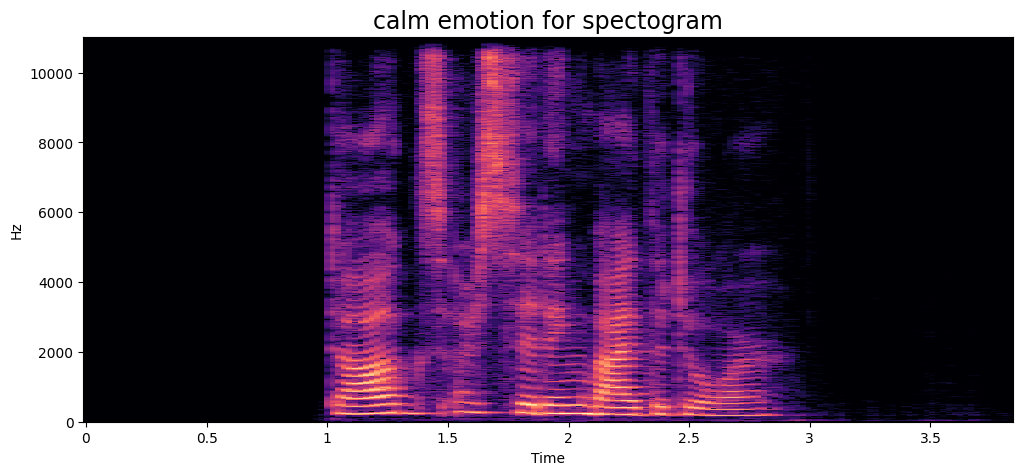

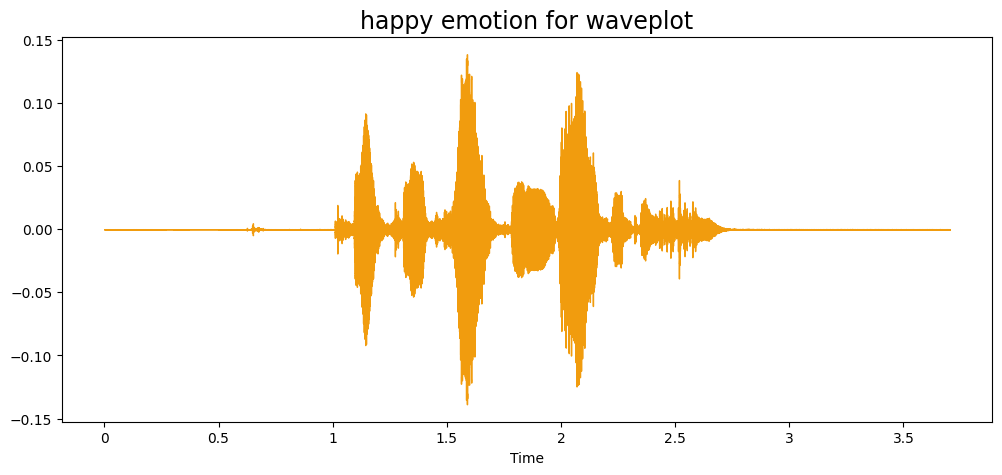

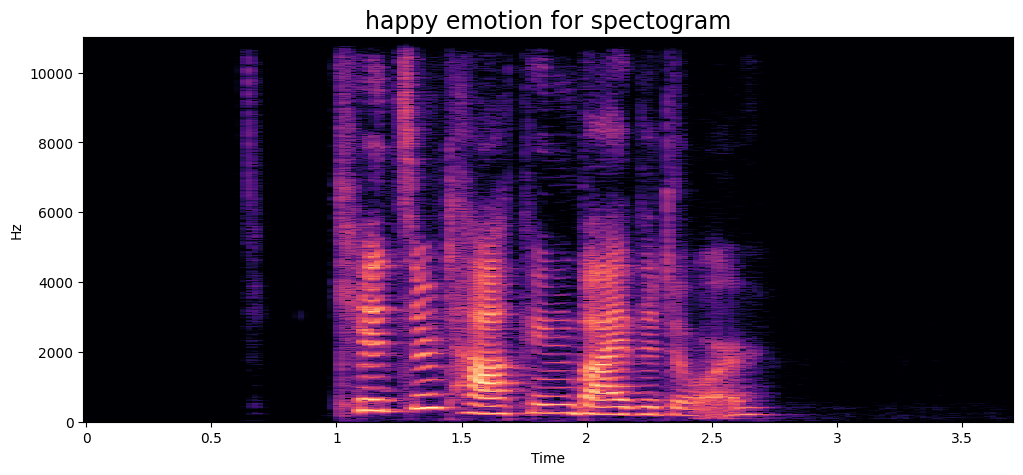

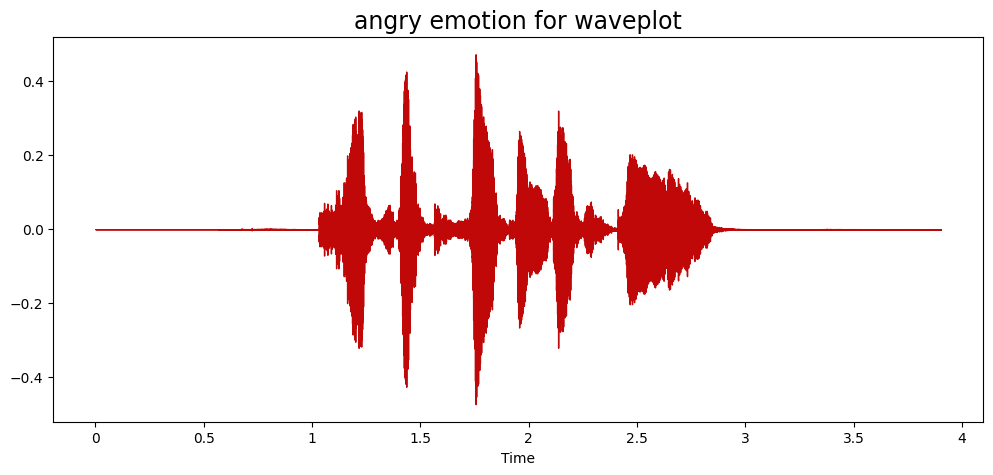

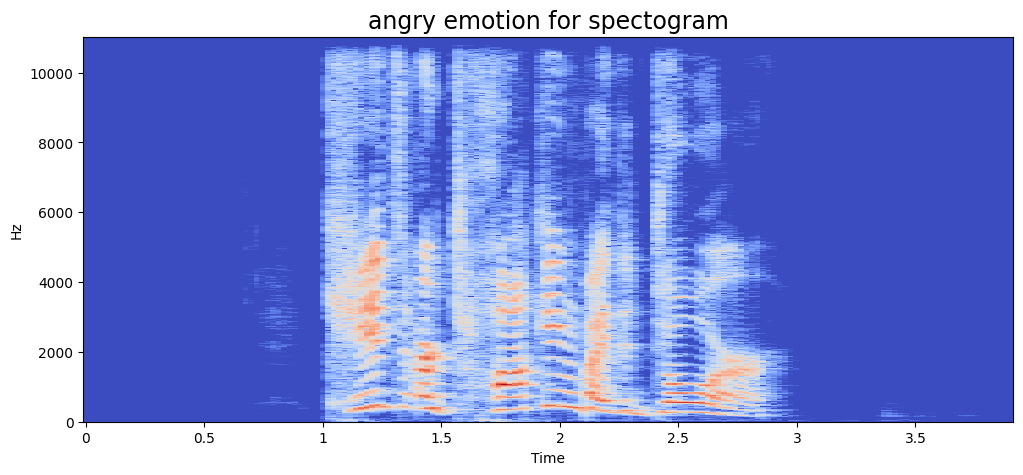

In [10]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(emotion_df['File_Path'][emotion_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [11]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data,sr=sr,n_steps=pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)
    

In [12]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def mfcc1(data, sr, frame_length=2048, hop_length=512):
    mfcc1 = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13, hop_length=hop_length)
    return mfcc1.T  # Transpose the result to have time along the rows

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

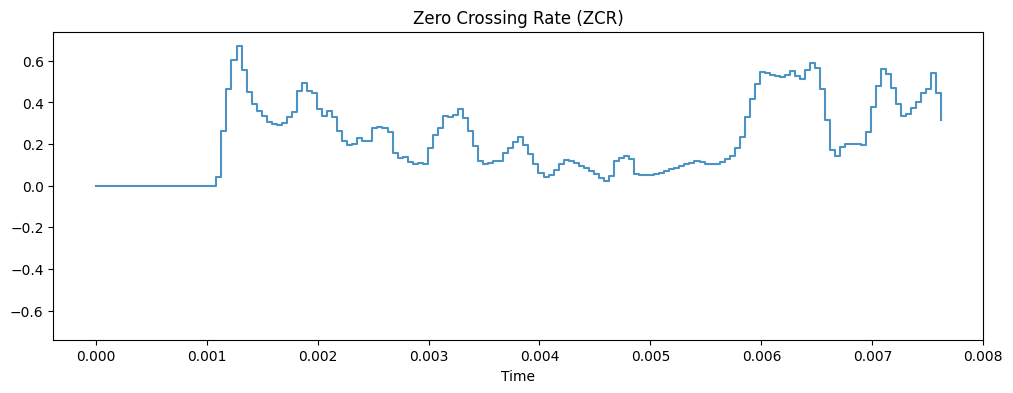

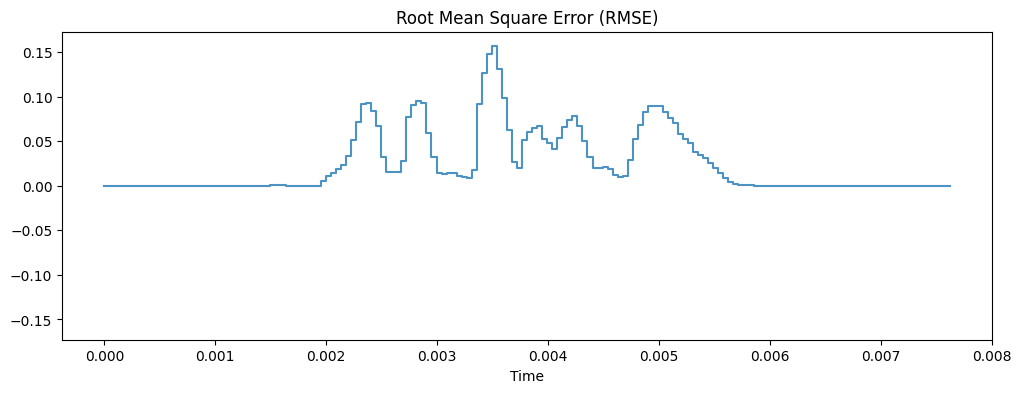

MFCC shape: (169, 13)


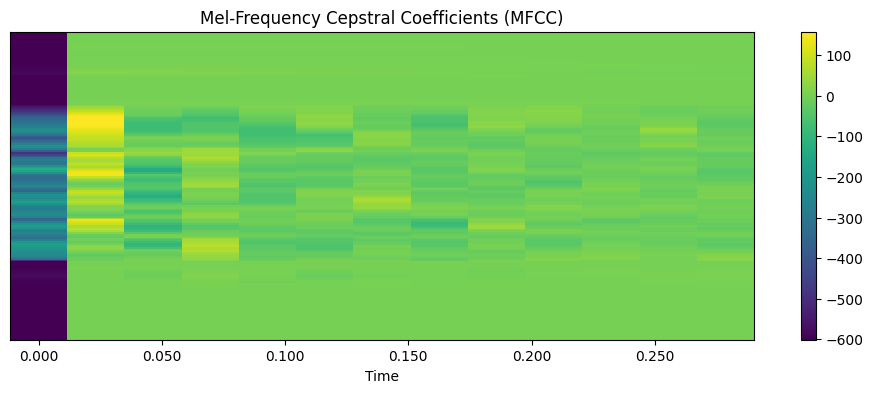

In [13]:
import librosa.display
import matplotlib.pyplot as plt

# Zero Crossing Rate (ZCR)
zcr_result = zcr(data, frame_length=2048, hop_length=512)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(zcr_result, sr=sr, alpha=0.8)
plt.title('Zero Crossing Rate (ZCR)')
plt.show()

# Root Mean Square Error (RMSE)
rmse_result = rmse(data, frame_length=2048, hop_length=512)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(rmse_result, sr=sr, alpha=0.8)
plt.title('Root Mean Square Error (RMSE)')
plt.show()

# Mel-Frequency Cepstral Coefficients (MFCC)
mfcc_result = mfcc1(data, sr=sr)
print("MFCC shape:", mfcc_result.shape)
# Use time as the x-axis
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_result, sr=sr, x_axis='time', hop_length=512, cmap='viridis')
plt.colorbar()
plt.title('Mel-Frequency Cepstral Coefficients (MFCC)')
plt.show()


In [14]:
X,Y=[],[]
for path,emotion,index in zip(emotion_df.File_Path,emotion_df.Emotion,range(emotion_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
Done


In [15]:
processed_data_path='./processed_data.csv'

In [16]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprised
1,0.242188,0.363281,0.481445,0.481445,0.489746,0.485840,0.500488,0.499023,0.498535,0.502930,...,5.235338,5.023173,6.219942,0.873667,-0.735436,2.341954,4.735247,-2.984425,-5.629219,surprised
2,0.310547,0.436035,0.534180,0.459473,0.374512,0.316406,0.280273,0.264160,0.254395,0.250977,...,-0.851397,0.522487,1.941603,3.160884,4.013098,4.434412,4.466367,4.232026,3.892401,surprised
3,0.246582,0.367676,0.495605,0.491211,0.491699,0.483398,0.466309,0.449707,0.436523,0.440430,...,-4.685902,-3.039876,-3.378923,3.195521,9.320526,5.878129,-0.843786,-5.684997,-0.688083,surprised
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral
5,0.238770,0.363770,0.485840,0.483398,0.484375,0.482910,0.497070,0.495117,0.500977,0.508301,...,0.564521,4.945174,4.175591,1.640100,-1.196482,-1.339790,-3.727406,3.410951,5.708458,neutral
6,0.304688,0.432129,0.555664,0.481445,0.456543,0.428711,0.409180,0.410156,0.411621,0.412598,...,5.377298,5.705185,4.728856,2.570758,-0.105343,-2.425790,-3.754522,-3.947349,-3.270011,neutral
7,0.248047,0.372559,0.502441,0.502441,0.506836,0.504395,0.497559,0.503418,0.497559,0.498047,...,2.958415,1.417599,-1.502642,-4.480418,-0.930826,0.673313,-1.815204,-7.058030,-0.185815,neutral
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.063477,0.176758,0.176758,0.254883,0.365723,...,-1.825551,-24.133347,18.153677,-15.056425,-7.674027,-13.918596,-5.563495,-7.357308,-0.008657,disgust
9,0.242676,0.371582,0.498047,0.505371,0.503906,0.494629,0.501465,0.494141,0.493164,0.503906,...,-5.596879,-12.500184,-1.821913,4.341781,-8.317458,-13.164826,-8.452085,-3.039265,-2.654694,disgust


In [17]:
df=pd.read_csv(processed_data_path)
df.shape

(5760, 2377)

In [18]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(5760, 2377)

In [19]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprised
1,0.242188,0.363281,0.481445,0.481445,0.489746,0.485840,0.500488,0.499023,0.498535,0.502930,...,5.235338,5.023173,6.219942,0.873667,-0.735436,2.341954,4.735247,-2.984425,-5.629219,surprised
2,0.310547,0.436035,0.534180,0.459473,0.374512,0.316406,0.280273,0.264160,0.254395,0.250977,...,-0.851397,0.522487,1.941603,3.160884,4.013098,4.434412,4.466367,4.232026,3.892401,surprised
3,0.246582,0.367676,0.495605,0.491211,0.491699,0.483398,0.466309,0.449707,0.436523,0.440430,...,-4.685902,-3.039876,-3.378923,3.195521,9.320526,5.878129,-0.843786,-5.684997,-0.688083,surprised
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral
5,0.238770,0.363770,0.485840,0.483398,0.484375,0.482910,0.497070,0.495117,0.500977,0.508301,...,0.564521,4.945174,4.175591,1.640100,-1.196482,-1.339790,-3.727406,3.410951,5.708458,neutral
6,0.304688,0.432129,0.555664,0.481445,0.456543,0.428711,0.409180,0.410156,0.411621,0.412598,...,5.377298,5.705185,4.728856,2.570758,-0.105343,-2.425790,-3.754522,-3.947349,-3.270011,neutral
7,0.248047,0.372559,0.502441,0.502441,0.506836,0.504395,0.497559,0.503418,0.497559,0.498047,...,2.958415,1.417599,-1.502642,-4.480418,-0.930826,0.673313,-1.815204,-7.058030,-0.185815,neutral
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.063477,0.176758,0.176758,0.254883,0.365723,...,-1.825551,-24.133347,18.153677,-15.056425,-7.674027,-13.918596,-5.563495,-7.357308,-0.008657,disgust
9,0.242676,0.371582,0.498047,0.505371,0.503906,0.494629,0.501465,0.494141,0.493164,0.503906,...,-5.596879,-12.500184,-1.821913,4.341781,-8.317458,-13.164826,-8.452085,-3.039265,-2.654694,disgust


In [20]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
lb=LabelEncoder()
Y=to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import os


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4608, 2376), (1152, 2376), (4608, 8), (1152, 8))

In [25]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((4147, 2376), (1152, 2376), (461, 2376), (4147, 8), (1152, 8), (461, 8))

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((4147, 2376), (1152, 2376), (461, 2376), (4147, 8), (1152, 8), (461, 8))

In [27]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((4147, 2376, 1), (1152, 2376, 1), (461, 2376, 1))

In [28]:
early_stop=EarlyStopping(monitor='val_acc',mode='min',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [29]:
EPOCH=50
BATCH_SIZE=64

In [30]:
import tensorflow as tf
from tensorflow.keras import layers as L

model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    # Adding LSTM layer after some Conv1D layers for RCNN structure
    L.LSTM(256, return_sequences=True),
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 297, 256)       │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,719,048 (29.45 MB)

 Trainable params: 7,714,696 (29.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [31]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.3314 - loss: 2.5410 - val_accuracy: 0.1453 - val_loss: 3.2611 - learning_rate: 0.0010
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.6160 - loss: 1.0624 - val_accuracy: 0.1323 - val_loss: 4.1913 - learning_rate: 0.0010
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.7630 - loss: 0.6883 - val_accuracy: 0.0846 - val_loss: 4.4588 - learning_rate: 0.0010
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8490 - loss: 0.4474 - val_accuracy: 0.0889 - val_loss: 4.5954 - learning_rate: 0.0010
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9019 - loss: 0.3080 - val_accuracy: 0.1453 - val_loss: 4.6753 - learning_rate: 0.0010
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9479 - loss: 0.1712 - val_accuracy: 0.1800 - val_loss: 5.3145 - learning_rate: 0.0010
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9662 - loss: 0.

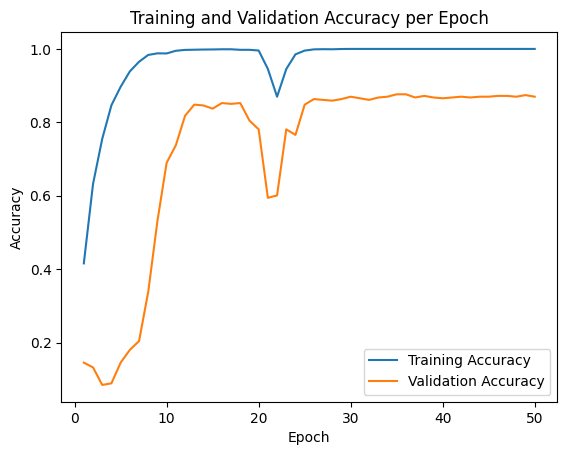

In [32]:
import matplotlib.pyplot as plt

# Assuming history.history is a dictionary with 'accuracy' and 'val_accuracy' as keys
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


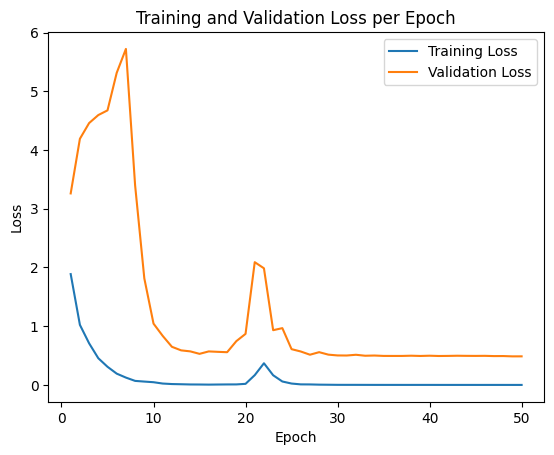

In [33]:
import matplotlib.pyplot as plt

# Assuming history.history is a dictionary with 'loss' and 'val_loss' keys
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [34]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


array([2, 5, 7, ..., 0, 2, 3])

In [35]:
y_check=np.argmax(y_test,axis=1)
y_check

array([2, 5, 7, ..., 0, 2, 3])

In [36]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.4087694585323334
Test Accuracy: 0.8949652910232544


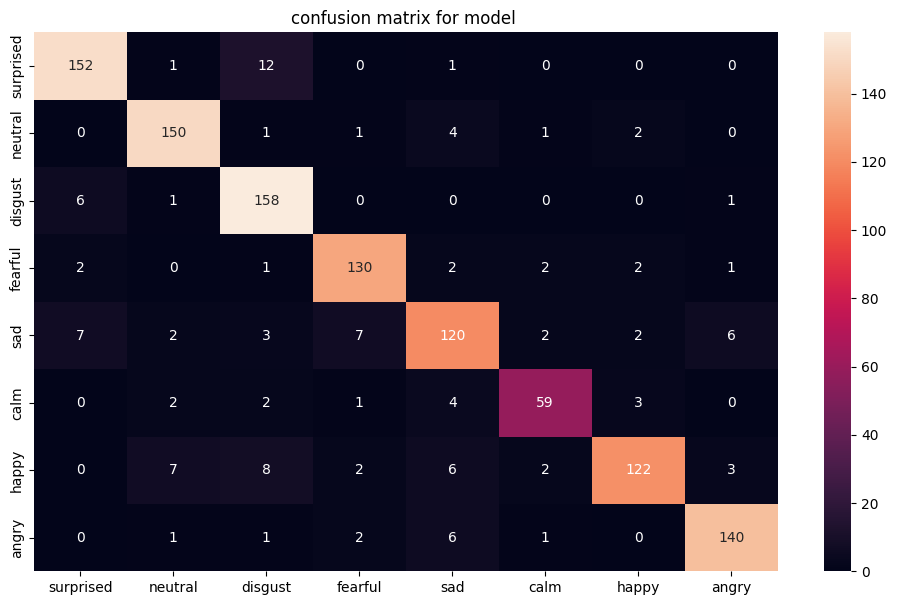

In [37]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [38]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

   surprised       0.91      0.92      0.91       166
     neutral       0.91      0.94      0.93       159
     disgust       0.85      0.95      0.90       166
     fearful       0.91      0.93      0.92       140
         sad       0.84      0.81      0.82       149
        calm       0.88      0.83      0.86        71
       happy       0.93      0.81      0.87       150
       angry       0.93      0.93      0.93       151

    accuracy                           0.89      1152
   macro avg       0.90      0.89      0.89      1152
weighted avg       0.90      0.89      0.89      1152



In [23]:
model_path = "./cnn.h5"

model.save(model_path)

# Gender 

In [40]:
import os
import pandas as pd

# Function to determine gender based on actor folder number
def get_gender_from_actor(actor_folder):
    actor_number = int(actor_folder.split('_')[1])  # Extract the numeric part
    return 'male' if actor_number <= 10 else 'female'

# Create lists to store file paths and genders
file_paths = []
genders = []

# Path to the RAVDESS dataset (replace with actual path)
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):  # Ensure we're looking at a directory
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                gender = get_gender_from_actor(actor_folder)
                
                # Append the file path and gender to the lists
                file_paths.append(file_path)
                genders.append(gender)

# Create a DataFrame
gender_df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders})
gender_df.head()  # Display the first few rows of the DataFrame


,File_Path,Gender
0,/kaggle/input/ravdess-emotional-speech-audio/A...,male
1,/kaggle/input/ravdess-emotional-speech-audio/A...,male
2,/kaggle/input/ravdess-emotional-speech-audio/A...,male
3,/kaggle/input/ravdess-emotional-speech-audio/A...,male
4,/kaggle/input/ravdess-emotional-speech-audio/A...,male


In [41]:
gender_df["Gender"].value_counts()

Gender
female    840
male      600
Name: count, dtype: int64

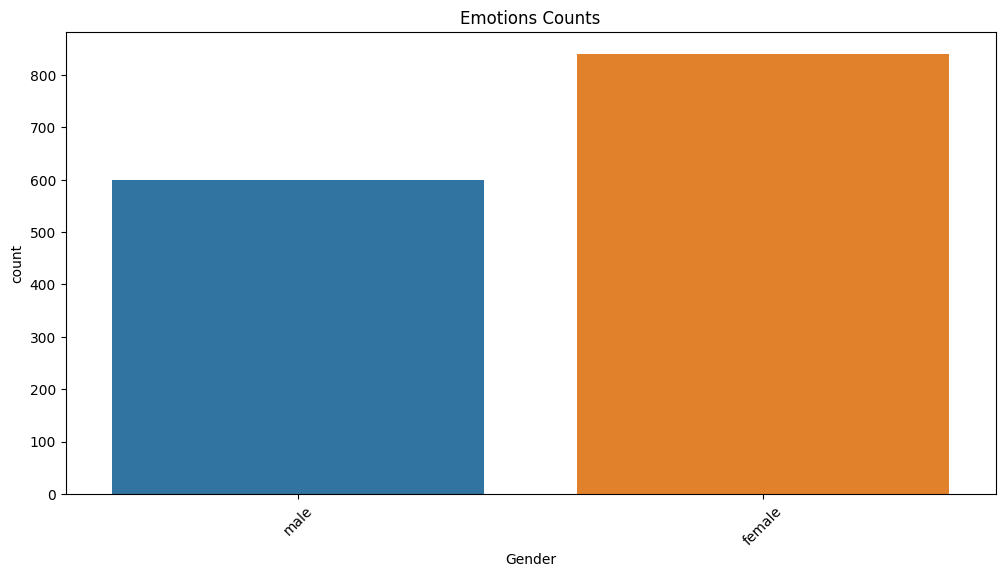

In [42]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
gender=sns.countplot(x="Gender",data=gender_df)
gender.set_xticklabels(gender.get_xticklabels(),rotation=45)
plt.show()

In [3]:
import os
import pandas as pd
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Dropout, TimeDistributed, BatchNormalization, Bidirectional
from tensorflow.keras import mixed_precision
from sklearn.metrics import classification_report

# Enable mixed precision to reduce memory usage
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Path to the RAVDESS dataset (replace with actual path)
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Function to determine gender based on actor folder number
def get_gender_from_actor(actor_folder):
    actor_number = int(actor_folder.split('_')[1])  # Extract the numeric part
    return 'male' if actor_number <= 10 else 'female'

# Lists to store file paths and genders
file_paths = []
genders = []

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                gender = get_gender_from_actor(actor_folder)
                
                file_paths.append(file_path)
                genders.append(gender)

# Create a DataFrame
gender_df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders})

# Balance the classes by upsampling the minority class
df_male = gender_df[gender_df['Gender'] == 'male']
df_female = gender_df[gender_df['Gender'] == 'female']

if len(df_male) > len(df_female):
    df_female_upsampled = resample(df_female, replace=True, n_samples=len(df_male), random_state=42)
    balanced_df = pd.concat([df_male, df_female_upsampled])
else:
    df_male_upsampled = resample(df_male, replace=True, n_samples=len(df_female), random_state=42)
    balanced_df = pd.concat([df_female, df_male_upsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define function to extract and pad Mel-spectrogram and MFCC features
def extract_features(file_path, n_mels=128, n_mfcc=13, max_length=128):
    audio, sr = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # Extract MFCCs and concatenate with Mel-spectrogram
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    features = np.vstack((mel_spectrogram_db, mfccs)).T  # Stack as (time, features)

    # Pad or truncate the feature matrix to max_length
    if features.shape[0] < max_length:
        padded_features = np.pad(features, ((0, max_length - features.shape[0]), (0, 0)), mode='constant')
    else:
        padded_features = features[:max_length, :]
    return padded_features

# Extract features and labels from the balanced dataset
features = []
labels = []

for index, row in balanced_df.iterrows():
    file_path = row['File_Path']
    gender = row['Gender']
    feature_data = extract_features(file_path)
    features.append(feature_data)
    labels.append(gender)

# Convert features and labels to numpy arrays
X = np.array(features)[..., np.newaxis]  # Add channel dimension
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the RCNN model with fewer filters and smaller input
model = Sequential()

# Reduced filters in CNN layers
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=(X.shape[1], X.shape[2], 1, 1)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D((2, 1))))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D((2, 1))))

model.add(TimeDistributed(Flatten()))

# BiLSTM with reduced units
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))
model.add(Dropout(0.5))

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Compile with mixed precision
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with smaller batch size
history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Show classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 122s 269ms/step - accuracy: 0.5001 - loss: 0.7657 - val_accuracy: 0.5130 - val_loss: 0.6942
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.4875 - loss: 0.7159 - val_accuracy: 0.5725 - val_loss: 0.6850
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.4818 - loss: 0.7113 - val_accuracy: 0.5651 - val_loss: 0.6925
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.5152 - loss: 0.6950 - val_accuracy: 0.5316 - val_loss: 0.6913
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.4882 - loss: 0.7051 - val_accuracy: 0.5130 - val_loss: 0.6918
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.5040 - loss: 0.6973 - val_accuracy: 0.5465 - val_loss: 0.6913
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 184ms/step - accuracy: 0.4960 - loss: 0.7013 - val_accuracy: 0.5390 - val_loss: 0.6898
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.5299 - loss: 

In [4]:
import os
import pandas as pd
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report

# Path to the RAVDESS dataset (replace with your actual path)
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Function to determine gender based on actor folder number
def get_gender_from_actor(actor_folder):
    actor_number = int(actor_folder.split('_')[1])  # Extract the numeric part
    return 'male' if actor_number <= 10 else 'female'

# Lists to store file paths and genders
file_paths = []
genders = []

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                gender = get_gender_from_actor(actor_folder)
                
                file_paths.append(file_path)
                genders.append(gender)

# Create a DataFrame
gender_df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders})

# Balance the classes by upsampling the minority class
df_male = gender_df[gender_df['Gender'] == 'male']
df_female = gender_df[gender_df['Gender'] == 'female']

if len(df_male) > len(df_female):
    df_female_upsampled = resample(df_female, replace=True, n_samples=len(df_male), random_state=42)
    balanced_df = pd.concat([df_male, df_female_upsampled])
else:
    df_male_upsampled = resample(df_male, replace=True, n_samples=len(df_female), random_state=42)
    balanced_df = pd.concat([df_female, df_male_upsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define function to extract and pad Mel-spectrogram features
def extract_features(file_path, n_mels=128, max_length=128):
    audio, sr = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Shape: (n_mels, time)

    # Transpose to have time steps along the first dimension
    features = mel_spectrogram_db.T  # Shape: (time, n_mels)

    # Pad or truncate the feature matrix to max_length
    if features.shape[0] < max_length:
        padded_features = np.pad(features, ((0, max_length - features.shape[0]), (0, 0)), mode='constant')
    else:
        padded_features = features[:max_length, :]
    return padded_features

# Extract features and labels from the balanced dataset
features = []
labels = []

for index, row in balanced_df.iterrows():
    file_path = row['File_Path']
    gender = row['Gender']
    feature_data = extract_features(file_path)
    features.append(feature_data)
    labels.append(gender)

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Add channel dimension for CNN input
X = X[..., np.newaxis]  # Shape: (samples, time_steps, n_mels, 1)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Show classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


I0000 00:00:1730985301.997817     110 service.cc:145] XLA service 0x57debcf9f4f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730985301.997878     110 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


28/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4737 - loss: 4.6779

I0000 00:00:1730985307.467169     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.4818 - loss: 6.1770 - val_accuracy: 0.4870 - val_loss: 8.2243
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4996 - loss: 8.0651 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5366 - loss: 7.4687 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4936 - loss: 8.1628 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5203 - loss: 7.7321 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4989 - loss: 8.0774 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5207 - loss: 7.7262 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5068 - loss: 7.9488 - val_accuracy: 0.4870 - val_loss: 8.2688
E

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report

# Define the path to the RAVDESS dataset
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Function to determine gender based on actor folder number
def get_gender_from_actor(actor_folder):
    actor_number = int(actor_folder.split('_')[1])  # Extract the numeric part
    return 'male' if actor_number <= 10 else 'female'

# Lists to store file paths and genders
file_paths = []
genders = []

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                gender = get_gender_from_actor(actor_folder)
                
                file_paths.append(file_path)
                genders.append(gender)

# Create a DataFrame
gender_df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders})

# Balance the classes by upsampling the minority class
df_male = gender_df[gender_df['Gender'] == 'male']
df_female = gender_df[gender_df['Gender'] == 'female']

if len(df_male) > len(df_female):
    df_female_upsampled = resample(df_female, replace=True, n_samples=len(df_male), random_state=42)
    balanced_df = pd.concat([df_male, df_female_upsampled])
else:
    df_male_upsampled = resample(df_male, replace=True, n_samples=len(df_female), random_state=42)
    balanced_df = pd.concat([df_female, df_male_upsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define function to extract and pad Mel-spectrogram features
def extract_features(file_path, n_mels=128, max_length=128):
    audio, sr = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    features = mel_spectrogram_db.T  # Shape: (time, n_mels)

    # Pad or truncate the feature matrix to max_length
    if features.shape[0] < max_length:
        padded_features = np.pad(features, ((0, max_length - features.shape[0]), (0, 0)), mode='constant')
    else:
        padded_features = features[:max_length, :]
    return padded_features

# Extract features and labels from the balanced dataset
features = []
labels = []

for index, row in balanced_df.iterrows():
    file_path = row['File_Path']
    gender = row['Gender']
    feature_data = extract_features(file_path)
    features.append(feature_data)
    labels.append(gender)

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Add channel dimension for CNN input
X = X[..., np.newaxis]  # Shape: (samples, time_steps, n_mels, 1)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()

# Model architecture
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Show classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.5191 - loss: 5.7549 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5085 - loss: 7.9216 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4941 - loss: 8.1546 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5095 - loss: 7.9064 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5062 - loss: 7.9593 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5295 - loss: 7.5828 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5449 - loss: 7.3354 - val_accuracy: 0.4870 - val_loss: 8.2688
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4885 - loss: 8.2444 - val_accuracy: 0.4870 - val_los

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Path to the RAVDESS dataset (replace with actual path)
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Function to determine gender based on actor folder number
def get_gender_from_actor(actor_folder):
    actor_number = int(actor_folder.split('_')[1])  # Extract the numeric part
    return 'male' if actor_number <= 10 else 'female'

# Lists to store file paths and genders
file_paths = []
genders = []

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                gender = get_gender_from_actor(actor_folder)
                
                file_paths.append(file_path)
                genders.append(gender)

# Create a DataFrame
gender_df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders})

# Balance the classes by upsampling the minority class
df_male = gender_df[gender_df['Gender'] == 'male']
df_female = gender_df[gender_df['Gender'] == 'female']

if len(df_male) > len(df_female):
    df_female_upsampled = resample(df_female, replace=True, n_samples=len(df_male), random_state=42)
    balanced_df = pd.concat([df_male, df_female_upsampled])
else:
    df_male_upsampled = resample(df_male, replace=True, n_samples=len(df_female), random_state=42)
    balanced_df = pd.concat([df_female, df_male_upsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define function to extract MFCC features
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)  # Take mean of each MFCC feature across time
    return mfccs_mean

# Extract features and labels from the balanced dataset
features = []
labels = []

for index, row in balanced_df.iterrows():
    file_path = row['File_Path']
    gender = row['Gender']
    feature_data = extract_mfcc(file_path)
    features.append(feature_data)
    labels.append(gender)

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

      female       0.69      0.74      0.72       175
        male       0.70      0.64      0.67       161

    accuracy                           0.69       336
   macro avg       0.69      0.69      0.69       336
weighted avg       0.69      0.69      0.69       336



In [9]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Path to the RAVDESS dataset (replace with actual path)
path_to_ravdess = '/kaggle/input/ravdess-emotional-speech-audio'

# Function to determine gender based on actor folder number
def get_gender_from_actor(actor_folder):
    actor_number = int(actor_folder.split('_')[1])  # Extract the numeric part
    return 'male' if actor_number <= 10 else 'female'

# Lists to store file paths and genders
file_paths = []
genders = []

# Iterate through each actor directory
for actor_folder in os.listdir(path_to_ravdess):
    actor_path = os.path.join(path_to_ravdess, actor_folder)
    
    if os.path.isdir(actor_path):
        for wav_file in os.listdir(actor_path):
            if wav_file.endswith('.wav'):
                file_path = os.path.join(actor_path, wav_file)
                gender = get_gender_from_actor(actor_folder)
                
                file_paths.append(file_path)
                genders.append(gender)

# Create a DataFrame
gender_df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders})

# Balance the classes by upsampling the minority class
df_male = gender_df[gender_df['Gender'] == 'male']
df_female = gender_df[gender_df['Gender'] == 'female']

if len(df_male) > len(df_female):
    df_female_upsampled = resample(df_female, replace=True, n_samples=len(df_male), random_state=42)
    balanced_df = pd.concat([df_male, df_female_upsampled])
else:
    df_male_upsampled = resample(df_male, replace=True, n_samples=len(df_female), random_state=42)
    balanced_df = pd.concat([df_female, df_male_upsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define function to extract MFCC features
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)  # Take mean of each MFCC feature across time
    return mfccs_mean

# Extract features and labels from the balanced dataset
features = []
labels = []

for index, row in balanced_df.iterrows():
    file_path = row['File_Path']
    gender = row['Gender']
    feature_data = extract_mfcc(file_path)
    features.append(feature_data)
    labels.append(gender)

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

      female       0.93      0.90      0.92       175
        male       0.90      0.93      0.91       161

    accuracy                           0.92       336
   macro avg       0.92      0.92      0.92       336
weighted avg       0.92      0.92      0.92       336



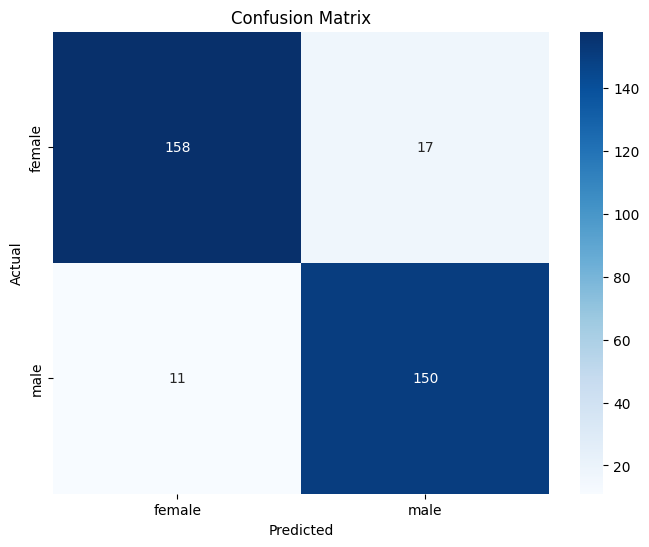

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import joblib
# Save the model
model_filename = 'gender_classification_model.joblib'
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to gender_classification_model.joblib


In [18]:
import joblib

# After training your model
# Save the label encoder
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label encoder saved to {label_encoder_filename}")


Label encoder saved to label_encoder.pkl


In [22]:
import joblib
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model_filename = 'gender_classification_model.joblib'
rf_model = joblib.load(model_filename)
print("Model loaded successfully.")

# Load the label encoder for transforming the predictions back to labels
label_encoder_filename = 'label_encoder.pkl'  # Assume you saved the label encoder as well
label_encoder = joblib.load(label_encoder_filename)

# Define function to extract MFCC features from a single audio file
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)  # Take mean of each MFCC feature across time
    return mfccs_mean

# Path to the audio file you want to predict
test_audio_file = '/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-01-01-02-01-22.wav'  # Replace with the actual path to your audio file

# Extract features from the test audio file
features = extract_mfcc(test_audio_file)

# Prepare the features for prediction (reshape for the model)
features_reshaped = features.reshape(1, -1)  # Reshape to match model input

# Make a prediction
predicted_class = rf_model.predict(features_reshaped)
predicted_label = label_encoder.inverse_transform(predicted_class)

# Display the result
print(f"The predicted gender for the audio file '{test_audio_file}' is: {predicted_label[0]}")


Model loaded successfully.
The predicted gender for the audio file '/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-01-01-02-01-22.wav' is: female
